In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import numpy as np

In [6]:
file_path = 'tabela_consolidada_ocorrencias_v2.xlsx'
df = pd.read_excel(file_path)

# Variáveis especificadas para seleção
selected_columns = [ 
 "total_aeronaves_envolvidas", "aeronave_tipo_veiculo",
 "aeronave_motor_quantidade", "aeronave_tipo_operacao", 
 "aeronave_fase_operacao", "AERONAVE ATINGIDA POR OBJETO","AERÓDROMO","ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO","CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO",
 "CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO","CAUSADO POR RICOCHETE","COLISÃO COM AERONAVE NO SOLO","COLISÃO COM AVE",
 "COLISÃO COM FAUNA","COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO", "COLISÃO COM OBSTÁCULOS NO SOLO","COLISÃO DE AERONAVES EM VOO",
 "COLISÃO DE VEÍCULO COM AERONAVE","COLISÃO EM VOO COM OBJETO REBOCADO","COLISÃO EM VOO COM OBSTÁCULO","COLISÃO NO SOLO",
 "COM CANOPI", "COM CARGAS EXTERNAS", "COM COMANDOS DE VOO", "COM HÉLICE", "COM LANÇAMENTO DE CARGA", "COM LANÇAMENTO DE PESSOAS",
 "COM PARA-BRISAS / JANELA / PORTA", "COM PESSOAL EM VOO","COM ROTOR","COM TRANSPORTE DE CARGA","COM TREM DE POUSO","COMBUSTÍVEL",
 "CONTATO ANORMAL COM A PISTA","CONTATO ANORMAL COM A PISTAA","CORTANTE DE VENTO / TEMPESTADE","CORTE INVOLUNTÁRIO DO MOTOR",
 "DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA", "DESORIENTAÇÃO ESPACIAL","ESTOURO DE PNEU", "EVACUAÇÃO", "EXCURSÃO DE PISTA", "EXPLOSÃO",
 "F.O.D.", "FALHA DO MOTOR EM VOO", "FALHA DO MOTOR NO SOLO","FALHA ESTRUTURAL","FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE", "FALHA OU MAU FUNCIONAMENTO DO MOTOR",
 "FOGO EM VOO", "FOGO NO SOLO", "FOGO/FUMAÇA (PÓS-IMPACTO)", "FOGO/FUMAÇA (SEM IMPACTO)", "FORMAÇÃO DE GELO", "FUMAÇA NA CABINE",
 "GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)", "HIPÓXIA", "IMC NÃO INTENCIONAL",	"INCURSÃO EM PISTA",
 "INDETERMINADO", "MANOBRA ABRUPTA", "OPERAÇÃO A BAIXA ALTITUDE",	"OPERAÇÕES NO SOLO",	"OUTROS",	"PANE SECA",	"PERDA DA CONSCIÊNCIA", "PERDA DE COMPONENTE EM VOO",
 "PERDA DE COMPONENTE NO SOLO",	"PERDA DE CONDIÇÕES DE SUSTENTAÇÃO EM ROTA",	"PERDA DE CONTROLE EM VOO",	 "PERDA DE CONTROLE NO SOLO", "PERDA DE SEPARAÇÃO / COLISÃO EM VOO",
 "POUSO ANTES DA PISTA", "POUSO AQUÉM/ALÉM DA PISTA", "POUSO BRUSCO", "POUSO EM LOCAL NÃO PREVISTO", "POUSO LONGO", "POUSO SEM TREM", "PROBLEMAS FISIOLÓGICOS", 
 "REBOQUE DE PLANADOR", "RELACIONADO COM SECURITY", "SAÍDA DE PISTA", "SOPRO DE REATOR", "SOPRO DE ROTOR", "SUPERAQUECIMENTO",	"TRÁFEGO AÉREO", "TURBULÊNCIA",
 "VAZAMENTO DE COMBUSTÍVEL", "VAZAMENTO DE OUTROS FLUIDOS",	"VOO CONTROLADO CONTRA O TERRENO"]

# Selecionar as colunas desejadas
df_selected = df[selected_columns]

# Remover linhas com NaN, None, vazias, "***" ou "****"
df_cleaned = df_selected.replace(["***", "****"], [None, None])
df_cleaned = df_cleaned.dropna()

# Transformar todas as colunas em dummies, excluindo a primeira categoria de cada uma
df_dummies = pd.get_dummies(df_cleaned, drop_first=True)

# Criar a variável binária para "ocorrencia_classificacao"
df['ocorrencia_classificacao_binaria'] = df['ocorrencia_classificacao'].apply(lambda x: 1 if x == 'ACIDENTE' else 0)

# Juntar a nova variável binária ao DataFrame com dummies
df_final = pd.concat([df_dummies, df['ocorrencia_classificacao_binaria']], axis=1)

df_final.dropna(inplace=True)
df_final = df_final.astype(int)

print(df_final.shape)

(5810, 137)


In [7]:
df_cleaned["aeronave_tipo_veiculo"].value_counts()

aeronave_tipo_veiculo
AVIÃO          4841
HELICÓPTERO     609
ULTRALEVE       327
ANFÍBIO          14
PLANADOR         14
TRIKE             2
HIDROAVIÃO        1
BALÃO             1
DIRIGÍVEL         1
Name: count, dtype: int64

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando VIF para cada feature verificar multicolinearidade
vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

print(vif_data)

c:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                         feature         VIF
0                     total_aeronaves_envolvidas  103.544032
1                   AERONAVE ATINGIDA POR OBJETO    1.090627
2                                      AERÓDROMO    1.097983
3    ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO    1.178798
4      CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO    1.454390
..                                           ...         ...
132             aeronave_fase_operacao_SAÍDA IFR    1.041982
133                aeronave_fase_operacao_SUBIDA    2.538592
134                  aeronave_fase_operacao_TÁXI    2.657783
135    aeronave_fase_operacao_VOO A BAIXA ALTURA    1.348957
136             ocorrencia_classificacao_binaria    2.833282

[137 rows x 2 columns]


In [9]:
#Renomeando coluna ocorrencia_classificacao_binaria
df_final.rename(columns={"ocorrencia_classificacao_binaria": "ocorrencia_acidente"}, inplace=True)

In [10]:
# Salvando o DataFrame final
df_final.to_excel("acidentes_aereos_dummizado_clean.xlsx", index=False)

In [11]:
df = pd.read_excel("acidentes_aereos_dummizado_clean.xlsx")

# Definindo quem é o nosso y e o nosso X
y = df["ocorrencia_acidente"]
X = df.drop(columns=["ocorrencia_acidente"])

# Separando o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import statsmodels.api as sm

# Adicionando a constante para o X_train (Intercepto)
X_train = sm.add_constant(X_train)

# Criando e treinando o modelo de regressão logística
logit_model = sm.Logit(y_train, X_train)

# Especificando o método de regularização (L1 - Lasso) e o valor da regularização (alpha)
lasso_model = logit_model.fit_regularized(method='l1', alpha=1.0)

# Printando o sumário do modelo
print(lasso_model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3359343412950863
            Iterations: 512
            Function evaluations: 512
            Gradient evaluations: 512
                            Logit Regression Results                           
Dep. Variable:     ocorrencia_acidente   No. Observations:                 4648
Model:                           Logit   Df Residuals:                     4577
Method:                            MLE   Df Model:                           70
Date:                 Fri, 22 Mar 2024   Pseudo R-squ.:                  0.4816
Time:                         09:50:07   Log-Likelihood:                -1495.2
converged:                        True   LL-Null:                       -2884.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                                                                                   coef    std err          z      P>|z|      [0.02

In [13]:
from sklearn.metrics import roc_auc_score, log_loss, cohen_kappa_score, matthews_corrcoef, confusion_matrix

def calculate_metrics_and_confusion_matrix(model, X_test, y_test):
    y_pred_prob = model.predict(sm.add_constant(X_test))

    #Threshold de probabilities para obter as predições binárias
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculando ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Calculando Log Loss
    log_loss_value = log_loss(y_test, y_pred_prob)

    # Calculando Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)

    # Calculando Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculando Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Print the calculated statistics
    print("ROC AUC Score:", roc_auc)
    print("Log Loss:", log_loss_value)
    print("Cohen's Kappa:", kappa)
    print("Matthews Correlation Coefficient:", mcc)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)

    return confusion

X_test_with_intercept = sm.add_constant(X_test)
confusion = calculate_metrics_and_confusion_matrix(lasso_model, X_test_with_intercept, y_test)


print("\nConfusion Matrix:")
print(confusion)


ROC AUC Score: 0.9136925265196305
Log Loss: 0.34333123686285827
Cohen's Kappa: 0.603757716676502
Matthews Correlation Coefficient: 0.6059081346245935
Sensitivity: 0.6811989100817438
Specificity: 0.9044025157232705
Confusion Matrix:
[[719  76]
 [117 250]]

Confusion Matrix:
[[719  76]
 [117 250]]


    ROC AUC Score (Área sob a curva ROC):
        O ROC AUC (Receiver Operating Characteristic Area Under Curve) é uma métrica que avalia o desempenho de um modelo de classificação binária. Ele mede a capacidade do modelo de distinguir entre as classes positiva e negativa com base na curva ROC. Quanto maior o valor do ROC AUC, melhor o modelo em separar as classes. Um valor de 0.9013 indica que o modelo tem uma boa capacidade de discriminação entre as classes.

    Log Loss (Perda Logarítmica):
        O Log Loss é uma medida da qualidade das probabilidades previstas por um modelo de classificação. Quanto menor o valor de Log Loss, melhor. O valor de 0.3749 sugere que o modelo está fazendo boas previsões probabilísticas, com menor incerteza.

    Cohen's Kappa (Kappa de Cohen):
        O Kappa de Cohen é uma métrica que avalia a concordância entre as previsões do modelo e as classes reais, levando em consideração a concordância que ocorreria por acaso. O valor de 0.6083 indica uma concordância significativa entre as previsões do modelo e os verdadeiros rótulos.

    Matthews Correlation Coefficient (Coeficiente de Correlação de Matthews):
        O Coeficiente de Correlação de Matthews é outra métrica que avalia a qualidade das previsões de um modelo de classificação binária. Ele leva em consideração verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Um valor de 0.6087 sugere uma relação positiva forte entre as previsões do modelo e os verdadeiros rótulos.

    Sensitivity (Sensibilidade):
        A sensibilidade mede a capacidade do modelo em identificar corretamente os exemplos da classe positiva (verdadeiros positivos). Um valor de 0.7696 indica que o modelo identificou corretamente cerca de 76,96% dos exemplos da classe positiva.

    Specificity (Especificidade):
        A especificidade mede a capacidade do modelo em identificar corretamente os exemplos da classe negativa (verdadeiros negativos). Um valor de 0.8450 indica que o modelo identificou corretamente cerca de 84,5% dos exemplos da classe negativa.

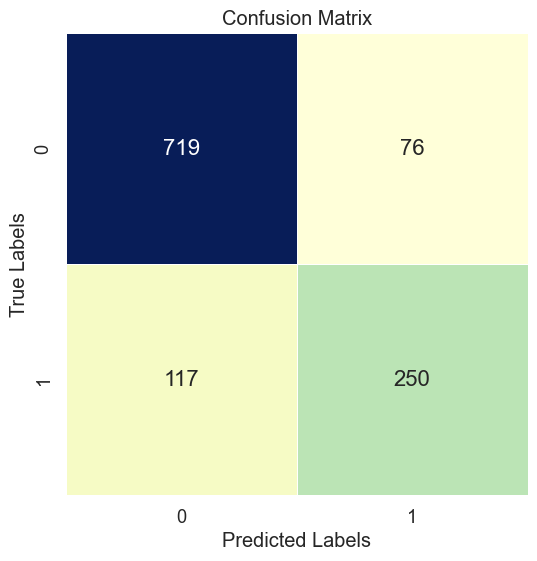

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustando o tamanho da fonte
sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            annot_kws={"size": 16}, linewidths=.5, square=True)

# Adicionando etiquetas e titulos
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Plotando
plt.show()